## **1. Data Collection and Preparation:**
Collect or create 15 pages of text for each of the three assigned topics, ensuring each
page contains approximately 500 words.

In [2]:
#  I Combine All the Data in Single File and Read it in Pandas DataFrame
import pandas as pd
combinrfile = './CombinedData.csv'
df = pd.read_csv(combinrfile, encoding='latin1')


## **2. Divide the Data in to Training And Test Part:**
First it make the group on the basis of the topic and then divide the data in to training and test part. 

In [3]:
training_data = pd.DataFrame()  # Initialize empty DataFrame for training data
test_data = pd.DataFrame()  # Initialize empty DataFrame for test data
for topic, group in df.groupby('Topic'):
    training_data = pd.concat([training_data, group.head(12)], ignore_index=True)
    test_data = pd.concat([test_data, group.tail(3)], ignore_index=True)

# Save the training and test data to csv files for future use

print('Total number of training data: ', len(training_data))
print('Total number of test data: ', len(test_data))        


Total number of training data:  36
Total number of test data:  9


# Data processing libraries and modules

In [4]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords

nltk.download('punkt')
nltk.download('stopwords')
stemmer = PorterStemmer() # Initialize the stemmer 
stop_words = set(stopwords.words('english'))


[nltk_data] Downloading package punkt to C:\Users\SONIC
[nltk_data]     LAPTOPS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\SONIC
[nltk_data]     LAPTOPS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# **2. Data Preprocessing: function**
This function will take the data and return the clean tokenized data.

In [5]:

def preprocess_text(text):
    tokens = word_tokenize(text)
    tokens = [token.lower() for token in tokens if token.isalpha()]
    tokens = [token for token in tokens if token not in stop_words]
    tokens = [stemmer.stem(token) for token in tokens]
    return tokens

# 3.Processing Training Data and Add lable in it

In [6]:
# Assuming `training_data` is a DataFrame containing the original text data and labels
preprocessed_train_set = []
for index, row in training_data.iterrows():
    preprocessed_text = preprocess_text(row['Text'])
    title_tokens = preprocess_text(row['Title'])
    body_tokens = preprocess_text(row['Text']) # Assuming you want to preprocess the body text
    words_count = len(preprocessed_text)  # Assuming you want to count preprocessed tokens
    preprocessed_train_set.append({
        'Preprocessed Text': preprocessed_text,
        'label': row['Topic'],
        'title_tokens': title_tokens,
        'body_tokens': body_tokens,
        'words_count': words_count
    })

preprocessed_train_set = pd.DataFrame(preprocessed_train_set)
for index, row in preprocessed_train_set.iterrows():
    print('Label:', row['label'])
    print('Title tokens:', row['title_tokens'])
    print('Body tokens:', row['body_tokens'])
    print('Words count:', row['words_count'])
    print('----------------------------------------') 

Label: Diseases And Symptoms
Title tokens: ['atrial', 'fibril']
Body tokens: ['typic', 'heart', 'tini', 'group', 'cell', 'sinu', 'node', 'send', 'electr', 'signal', 'signal', 'travel', 'heart', 'upper', 'chamber', 'atrioventricular', 'av', 'node', 'signal', 'pass', 'lower', 'heart', 'chamber', 'caus', 'squeez', 'pump', 'blood', 'atrial', 'fibril', 'electr', 'signal', 'fire', 'mani', 'locat', 'upper', 'chamber', 'caus', 'beat', 'chaotic', 'sinc', 'av', 'node', 'prevent', 'chaotic', 'signal', 'enter', 'lower', 'chamber', 'heart', 'beat', 'faster', 'typic', 'heart', 'tini', 'group', 'cell', 'sinu', 'node', 'send', 'electr', 'signal', 'signal', 'travel', 'heart', 'upper', 'chamber', 'atrioventricular', 'av', 'node', 'signal', 'pass', 'lower', 'heart', 'chamber', 'caus', 'squeez', 'pump', 'blood', 'atrial', 'fibril', 'electr', 'signal', 'fire', 'mani', 'locat', 'upper', 'chamber', 'caus', 'beat', 'chaotic', 'sinc', 'av', 'node', 'prevent', 'chaotic', 'signal', 'enter', 'lower', 'chamber', '

# **4.Graph of training Data:**

In [7]:
import networkx as nx
def construct_graph(tokens):
        G = nx.DiGraph()
        for i in range(len(tokens) - 1):
            if not G.has_edge(tokens[i], tokens[i + 1]):
                G.add_edge(tokens[i], tokens[i + 1], weight=1, arrows='to')
            else:
                G.edges[tokens[i], tokens[i + 1]]['weight'] += 1 
                G.edges[tokens[i], tokens[i + 1]]['arrows'] = 'to'
        return G

# **5. Training Graphs With label:**

In [8]:
graphs_train_set = []
for index , article  in preprocessed_train_set.iterrows():
    print("Article : ", index+1, "Label: ", article['label'], "Graph built")
    graph = construct_graph(article['body_tokens'])
    graphs_train_set.append(graph)
    


Article :  1 Label:  Diseases And Symptoms Graph built
Article :  2 Label:  Diseases And Symptoms Graph built
Article :  3 Label:  Diseases And Symptoms Graph built
Article :  4 Label:  Diseases And Symptoms Graph built
Article :  5 Label:  Diseases And Symptoms Graph built
Article :  6 Label:  Diseases And Symptoms Graph built
Article :  7 Label:  Diseases And Symptoms Graph built
Article :  8 Label:  Diseases And Symptoms Graph built
Article :  9 Label:  Diseases And Symptoms Graph built
Article :  10 Label:  Diseases And Symptoms Graph built
Article :  11 Label:  Diseases And Symptoms Graph built
Article :  12 Label:  Diseases And Symptoms Graph built
Article :  13 Label:  Food Graph built
Article :  14 Label:  Food Graph built
Article :  15 Label:  Food Graph built
Article :  16 Label:  Food Graph built
Article :  17 Label:  Food Graph built
Article :  18 Label:  Food Graph built
Article :  19 Label:  Food Graph built
Article :  20 Label:  Food Graph built
Article :  21 Label:  Foo

# **6. Testing Data Tokenization :**


In [9]:
# Assuming `training_data` is a DataFrame containing the original text data and labels
preprocessed_test_set = []
for index, row in test_data.iterrows():
    preprocessed_text = preprocess_text(row['Text'])
    title_tokens = preprocess_text(row['Title'])
    body_tokens = preprocess_text(row['Text']) # Assuming you want to preprocess the body text
    words_count = len(preprocessed_text)  # Assuming you want to count preprocessed tokens
    preprocessed_test_set.append({
        'Preprocessed Text': preprocessed_text,
        'label': row['Topic'],
        'title_tokens': title_tokens,
        'body_tokens': body_tokens,
        'words_count': words_count
    })
preprocessed_test_set = pd.DataFrame(preprocessed_test_set)
for index, row in preprocessed_test_set.iterrows():
    print('Label:', row['label'])
    print('Title tokens:', row['title_tokens'])
    print('Body tokens:', row['body_tokens'])
    print('Words count:', row['words_count'])
    print('----------------------------------------') 

Label: Diseases And Symptoms
Title tokens: ['acut', 'coronari', 'syndrom']
Body tokens: ['acut', 'coronari', 'syndrom', 'term', 'describ', 'rang', 'condit', 'relat', 'sudden', 'reduc', 'blood', 'flow', 'heart', 'condit', 'includ', 'heart', 'attack', 'unstabl', 'heart', 'attack', 'happen', 'cell', 'death', 'damag', 'destroy', 'heart', 'tissu', 'heart', 'attack', 'also', 'known', 'myocardi', 'angina', 'occur', 'blood', 'flow', 'heart', 'decreas', 'sever', 'enough', 'caus', 'cell', 'death', 'heart', 'attack', 'reduc', 'blood', 'flow', 'may', 'increas', 'risk', 'heart', 'coronari', 'syndrom', 'often', 'caus', 'sever', 'chest', 'pain', 'discomfort', 'medic', 'emerg', 'need', 'diagnosi', 'care', 'right', 'away', 'goal', 'treatment', 'includ', 'improv', 'blood', 'flow', 'treat', 'complic', 'prevent', 'futur', 'symptom', 'acut', 'coronari', 'syndrom', 'usual', 'begin', 'suddenli', 'includ', 'chest', 'pain', 'discomfort', 'common', 'symptom', 'symptom', 'may', 'vari', 'quit', 'bit', 'depend', '

# **7. Testing Data Graphs:**

In [10]:
graphs_test_set = []
for index , article  in preprocessed_test_set.iterrows():
    print("Article : ", index+1, "Label: ", article['label'], "Graph built")
    graph = construct_graph(article['body_tokens'])
    graphs_test_set.append(graph) 

Article :  1 Label:  Diseases And Symptoms Graph built
Article :  2 Label:  Diseases And Symptoms Graph built
Article :  3 Label:  Diseases And Symptoms Graph built
Article :  4 Label:  Food Graph built
Article :  5 Label:  Food Graph built
Article :  6 Label:  Food Graph built
Article :  7 Label:  Sport Graph built
Article :  8 Label:  Sport Graph built
Article :  9 Label:  Sport Graph built


# **7. Function to find MCS of Two Graphs:**

In [11]:
import networkx as nx
import numpy as np
from sklearn.neighbors import KNeighborsClassifier 


# Function to compute MCS between two graphs 
def compute_mcs(graph1, graph2):
    # Extract the set of edges from each graph
    edges1 = set(graph1.edges())
    edges2 = set(graph2.edges())
    # Compute the set of common edges between the two graphs
    common_edges = edges1.intersection(edges2)
    # Construct a new graph using the common edges, representing the maximal common subgraph
    mcs_graph = nx.Graph(list(common_edges)) 
    # Calculate the graph distance (negative size of the maximal common subgraph)
    distance = len(mcs_graph.edges())
    
    return distance

# **8. Distances between test graph and all training graphs:**

In [12]:
# Function to compute distances between test graph and all training graphs
def compute_distances(test_graph, training_graphs):
    distances = []
    for training_graph in training_graphs:
        mcs = compute_mcs(test_graph, training_graph)
        # Convert MCS to a distance measure and normalize
        distance = 1 - (mcs / max(len(test_graph.edges()), len(training_graph.edges())))
        distances.append(distance)
    return distances

# **9.KNN Classifier**

In [13]:
# Implement the KNN Classifier
training_labels = training_data['Topic'].tolist() # Get the labels of the training set
k = 2 # Number of neighbors to consider
 
def predict(graph):
    distances = []
    # Compute the distance between the input graph and all training graphs
    distances = compute_distances(graph, graphs_train_set)
    # Get the indices of the k-nearest neighbors 
    nearest_indices = sorted(range(len(distances)), key=lambda i: distances[i])[:k]
    nearest_labels = [training_labels[i] for i in nearest_indices] # Get the labels of the k-nearest neighbors
    prediction = max(set(nearest_labels), key=nearest_labels.count) # Get the most common label  
    return prediction

# **Pridicting the data using the model:**

In [14]:
# Predict the labels of the test graphs
predicted_labels = []
for test_graph in graphs_test_set:
    # predicted_label = predict_label(test_graph, classifier)
    predicted_label = predict(test_graph)   
    print('Predicted label:', predicted_label)
    predicted_labels.append(predicted_label)

[0.9405684754521964, 0.9206349206349207, 0.9518900343642611, 0.9289099526066351, 0.95, 0.937007874015748, 0.9452054794520548, 0.9654320987654321, 0.9538043478260869, 0.9464285714285714, 0.9546599496221663, 0.9751166407465007, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Predicted label: Diseases And Symptoms
[0.9509043927648578, 0.9365079365079365, 0.9518900343642611, 0.9289099526066351, 0.95, 0.9330708661417323, 0.9554794520547946, 0.9604938271604938, 0.9619565217391304, 0.9392857142857143, 0.9596977329974811, 0.973561430793157, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Predicted label: Diseases And Symptoms
[0.7674418604651163, 0.7471590909090908, 0.7414772727272727, 0.7954545454545454, 0.75, 0.8039772727272727, 0.7471590909090908, 0.7753086419753086, 0.7554347826086957, 0.7386363636363636, 0.818639798488665, 0.8553654743390358, 1.0,

## **7. Evaluation:**
Assessing the performance of classification system using metrics such as accuracy, precision, recall, and F1-score and by ploting confusion matrix.

In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

Predicted Labels vs Actual Labels:
Predicted: Diseases And Symptoms, Actual: Diseases And Symptoms
Predicted: Diseases And Symptoms, Actual: Diseases And Symptoms
Predicted: Diseases And Symptoms, Actual: Diseases And Symptoms
Predicted: Food, Actual: Food
Predicted: Food, Actual: Food
Predicted: Food, Actual: Food
Predicted: Sport, Actual: Sport
Predicted: Sport, Actual: Sport
Predicted: Sport, Actual: Sport

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0

Classification Report:
                       precision    recall  f1-score   support

Diseases And Symptoms       1.00      1.00      1.00         3
                 Food       1.00      1.00      1.00         3
                Sport       1.00      1.00      1.00         3

             accuracy                           1.00         9
            macro avg       1.00      1.00      1.00         9
         weighted avg       1.00      1.00      1.00         9


Confusion Matrix:


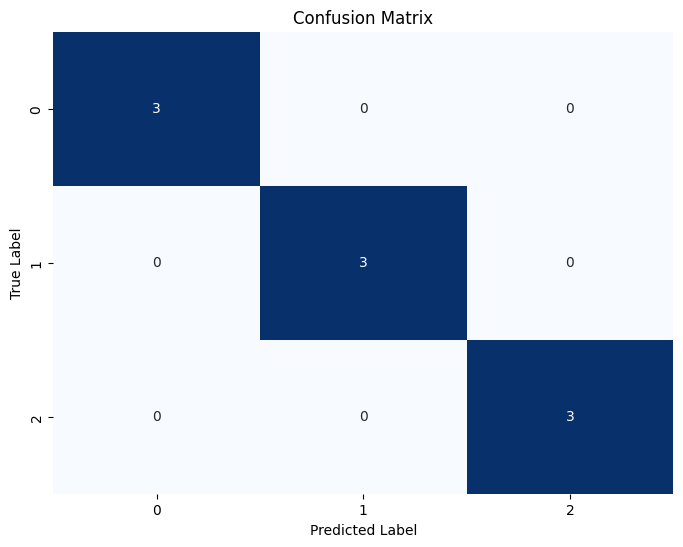

In [16]:
# Calculate evaluation metrics  
y_true = test_data['Topic'].tolist()
y_pred = predicted_labels

# Calculate evaluation metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')
report = classification_report(y_true, y_pred)

# Print the predicted labels and actual labels
print("Predicted Labels vs Actual Labels:")
for i in range(len(predicted_labels)):
    print(f"Predicted: {predicted_labels[i]}, Actual: {y_true[i]}")
print()

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print()

# Print classification report
print("Classification Report:")
print(report)
print()

# Plot confusion matrix
print("Confusion Matrix:")
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()